<a id='start'></a>

# Solar Orbiter 8 Data Workshop Data Analysis Tutorial -- RPW TNR Data analysis

This notebook presents how to display a Type III Solar Radio burst observed on RPW TNR dynamical spectrum.

More examples can be found in https://rpw.lesia.obspm.fr/rpw-data/data-reading

IMPORTANT: Before starting the tutorial, make sure to have the following RPW data file available in the /Data folder (see get_rpw_data notebook for more details to downlink RPW data files):
* solo_L2_rpw-tnr-suv_20211009_V??.cdf



In [1]:
## 1. Import modules
from pathlib import Path

import os

# Make sure CDF lib is loaded
os.environ["CDF_LIB"] = os.path.join(os.getcwd(),
                                     'cdf38_1-dist', 'bin' ,'definitions.B')

import matplotlib.pyplot as plt
import matplotlib.colorbar as cbar

# Requires MASER module (https://gitlab.obspm.fr/maser/maser4py/-/tree/namespace)
from maser.data import Data
from maser.plot.rpw.tnr import plot_auto

In [2]:
## 2. Set input filepath, parse TNR CDF and return expected parameters (time, freq, intensity)

# Set date of data
date = "20211009"

filedir = Path.cwd() / "Data"
filepath = list(filedir.glob("solo_L2_rpw-tnr-surv_{0}_V??.cdf".format(date)))
if len(filepath) == 0:
    print('ERROR - No solo_L2_rpw-tnr-surv_{0} CDF file found in /Data, please check !'.format(date))
else:
    filepath = filepath[0]

try:
    tnr_data = Data(filepath=str(filepath))
except:
    print('ERROR - Cannot load {0}!'.format(filepath))
else:
    print('{0} loaded'.format(filepath))

/Users/xbonnin/Work/Projects/SolarOrbiter/RPW/ROC/Software/Git/Tutorials/python-tnr-tds-tutorial/Data/solo_L2_rpw-tnr-surv_20211009_V02.cdf loaded


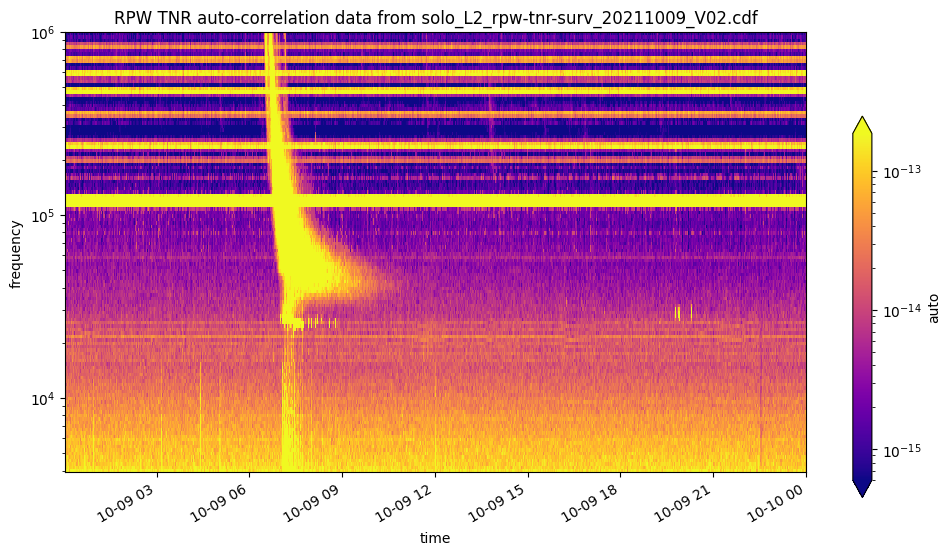

In [3]:
# 3a. Plot data "as is" (i.e., without any post-processing or filters)
fig, ax = plt.subplots(figsize=(10, 5))
# Define plot main title
#fig.suptitle("RPW Tuto")
fig.tight_layout()
cbar_ax, kw = cbar.make_axes(ax, shrink=1.4)
# plot AUTO
plot_auto(tnr_data, ax=ax, figure=fig, cbar_ax=cbar_ax)
# Define plot subtitle
ax.set_title('RPW TNR auto-correlation data from ' + filepath.name)
plt.show()


In [4]:
# 3b. Work with data

# Print data inside CDF file (returns spacepy.pycdf.CDF object)
print(tnr_data.file)

# get Epoch and AUTO1 data
#epoch = tnr_data.file['Epoch'][...]
#auto1 = tnr_data.file['AUTO1'][...]



AUTO1: CDF_DOUBLE [93660, 32]
AUTO2: CDF_DOUBLE [93660, 32]
AUTO_CROSS_STATUS: CDF_UINT1 [93660, 2]
AVERAGE_NR: CDF_UINT1 [93660]
BANDWIDTH: CDF_FLOAT [4, 32] NRV
BAND_LABEL: CDF_CHAR*1 [4] NRV
CHANNEL_LABEL: CDF_CHAR*1 [2] NRV
CHANNEL_STATUS: CDF_UINT1 [93660, 2]
CROSS_I: CDF_DOUBLE [93660, 32]
CROSS_R: CDF_DOUBLE [93660, 32]
DELTA_TIME: CDF_DOUBLE [93660]
Epoch: CDF_TIME_TT2000 [93660]
FLUX_DENSITY1: CDF_DOUBLE [93660, 32]
FLUX_DENSITY2: CDF_DOUBLE [93660, 32]
FREQUENCY: CDF_UINT4 [93660, 32]
FRONT_END: CDF_UINT1 [93660]
INTEGRATION_TIME: CDF_UINT1 [4] NRV
MAGNETIC_SPECTRAL_POWER1: CDF_DOUBLE [93660, 32]
MAGNETIC_SPECTRAL_POWER2: CDF_DOUBLE [93660, 32]
MEASUREMENT_DURATION: CDF_DOUBLE [93660]
NUM: CDF_UINT4 [93660]
PHASE: CDF_DOUBLE [93660, 32]
QUALITY_BITMASK: CDF_UINT2 [93660]
QUALITY_FLAG: CDF_UINT1 [93660]
RPW_STATUS: CDF_UINT1 [93660, 15]
RPW_STATUS_LABEL: CDF_CHAR*16 [15] NRV
SENSOR_CONFIG: CDF_UINT1 [93660, 2]
SURVEY_MODE: CDF_UINT1 [93660]
SWEEP_NUM: CDF_UINT4 [93660]
SYNCHRO

## TNR filtered data

<img src=./Pictures/solo_L3_rpw-tnr-surv_20211009_V05.png width=90% class="center">

Upper : raw data; some interference lines are masked. Lower: filtered data to remove interference lines ( https://rpw.lesia.obspm.fr/rpw-data/daily-summary-plots/ ).